In [1]:
import numpy as np
from numpy import loadtxt

from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from pyESN import ESN

In [3]:
def myMSE(prediction,target):
    return np.sqrt(np.mean((prediction.flatten() - target.flatten() )**2))

def residuals(prediction,target):
    return (target.flatten() - prediction.flatten())

def plotResults(trainlen, testlen, data, yfit, yhat, resTrain, resTest):
    plt.figure(figsize=(14,6))
    plt.subplot(2,1,1)
    plt.plot(range(0,trainlen+testlen), data,'k',  linewidth=2, label="data")
    plt.plot(range(0,trainlen),yfit,'--g',  linewidth=2, alpha=0.9, label="train")
    plt.plot(range(trainlen,trainlen+testlen), yhat,'--r', linewidth=2,  alpha=1, label="test")
    lo,hi = plt.ylim()
    plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'--b',alpha=0.8, linewidth=4)
    plt.tight_layout()
    plt.ylabel('x')
    plt.legend(loc=(0.1,1.1),fontsize=18,ncol=3)

    
    #
    plt.subplot(2,1,2)
    plt.plot(range(0,trainlen),resTrain,'--g',  linewidth=2, alpha=0.9, label="train")
    plt.plot(range(trainlen,trainlen+testlen), resTest,'--r', linewidth=2,  alpha=1, label="test")
    lo,hi = plt.ylim()
    plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'--b',alpha=0.8, linewidth=4)
    plt.tight_layout()
    plt.ylabel('Residuals')



### Mackey Glass: Nonlinear function, solution of a delay nonlinear differential equation

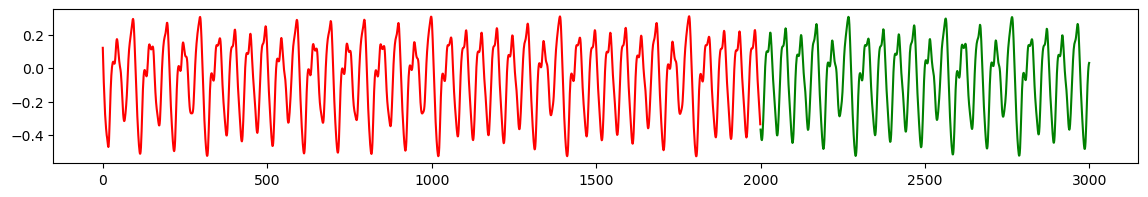

In [4]:
data = np.load('data/MG/mackey_glass_t17.npy') 
data = data[:3000]

trainlen = 2000
testlen  =1000
# Input  data
xtrain = np.ones(trainlen)
xtest=np.ones(testlen)
# Output data
ytrain = data[:trainlen]
ytest = data[trainlen:trainlen+testlen]

plt.figure(figsize=(14,2))
plt.plot(range(0,trainlen), ytrain,'r')
plt.plot(range(trainlen,trainlen+testlen), ytest,'-g')


In [5]:
# Setup the RC hyper-parameters
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 1.5,
          sparsity=.2,          
          random_state=42)

# Train and predict 
yfit = esn.fit(xtrain,ytrain)
yhat = prediction = esn.predict(xtest)

Training mean square error:  0.00011084861928946906
Testing  mean square error:  0.0927746139575346


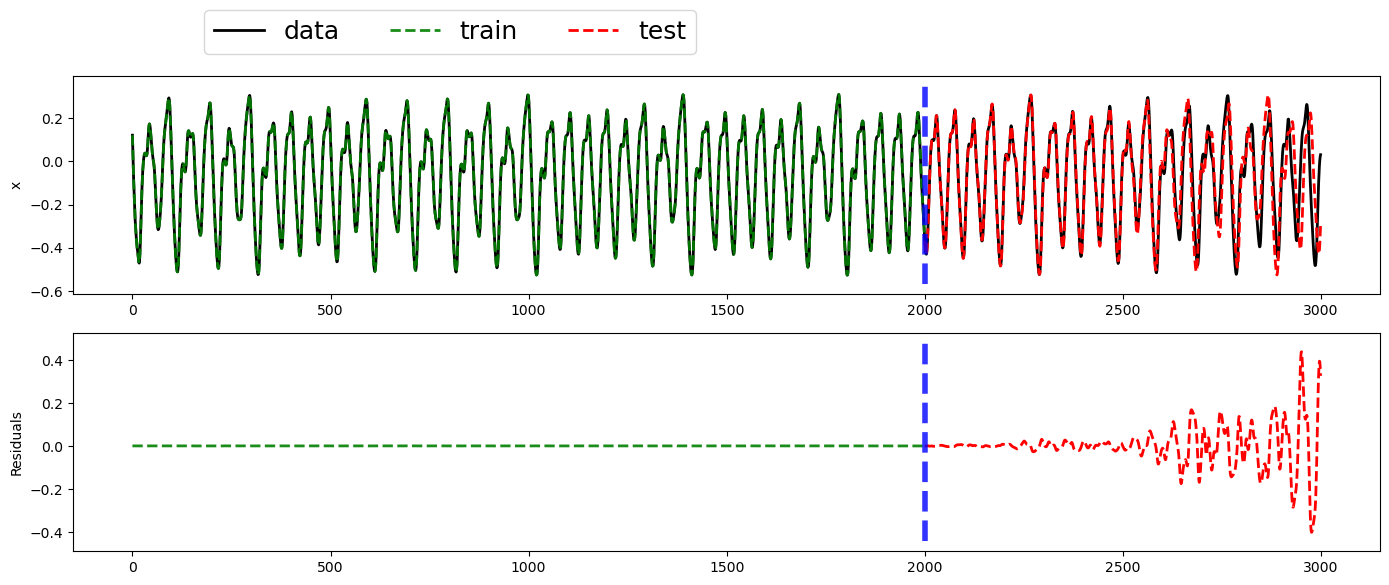

In [6]:
# MSE in the training and testing
scoreTrain = myMSE(yfit,ytrain)
scoreTest = myMSE(yhat,ytest)
print("Training mean square error: ",scoreTrain)
print("Testing  mean square error: ",scoreTest)

# Residuals 
resTrain = residuals(yfit,ytrain);
resTest = residuals(yhat,ytest);

# Plot:
plotResults(trainlen, testlen, data, yfit, yhat, resTrain, resTest)

# plt.savefig('MG_example.png', dpi = 300)

In [7]:
# Setup the RC hyper-parameters
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 1.5,
          sparsity=.2,
          out_activation = np.tanh,
          inverse_out_activation = np.arctanh,
          random_state=42)

    
# Train and predict 
yfit = esn.fit(xtrain,ytrain)
yhat = prediction = esn.predict(xtest)


Training mean square error:  0.00013448752051688033
Testing  mean square error:  0.0384520823538609


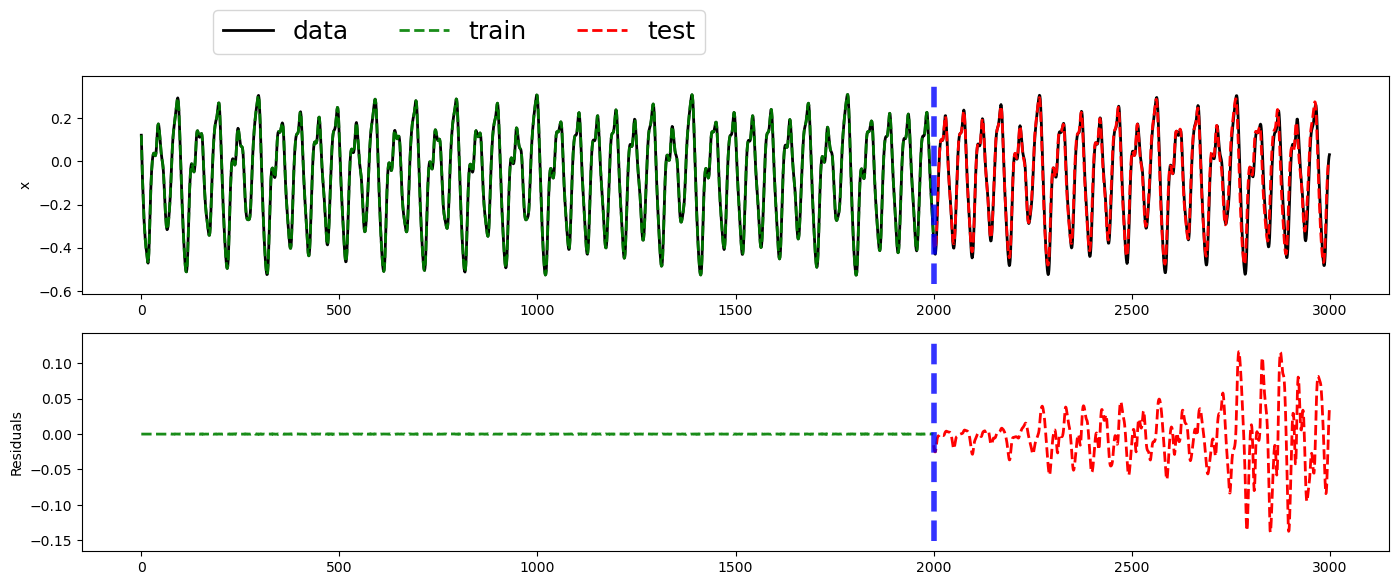

In [8]:
# MSE in the training and testing
scoreTrain = myMSE(yfit,ytrain)
scoreTest = myMSE(yhat,ytest)
print("Training mean square error: ",scoreTrain)
print("Testing  mean square error: ",scoreTest)

# Residuals 
resTrain = residuals(yfit,ytrain);
resTest = residuals(yhat,ytest);

# Plot:
plotResults(trainlen, testlen, data, yfit, yhat, resTrain, resTest)

### Henon-Heiles System

The time series consist of  1000  points.


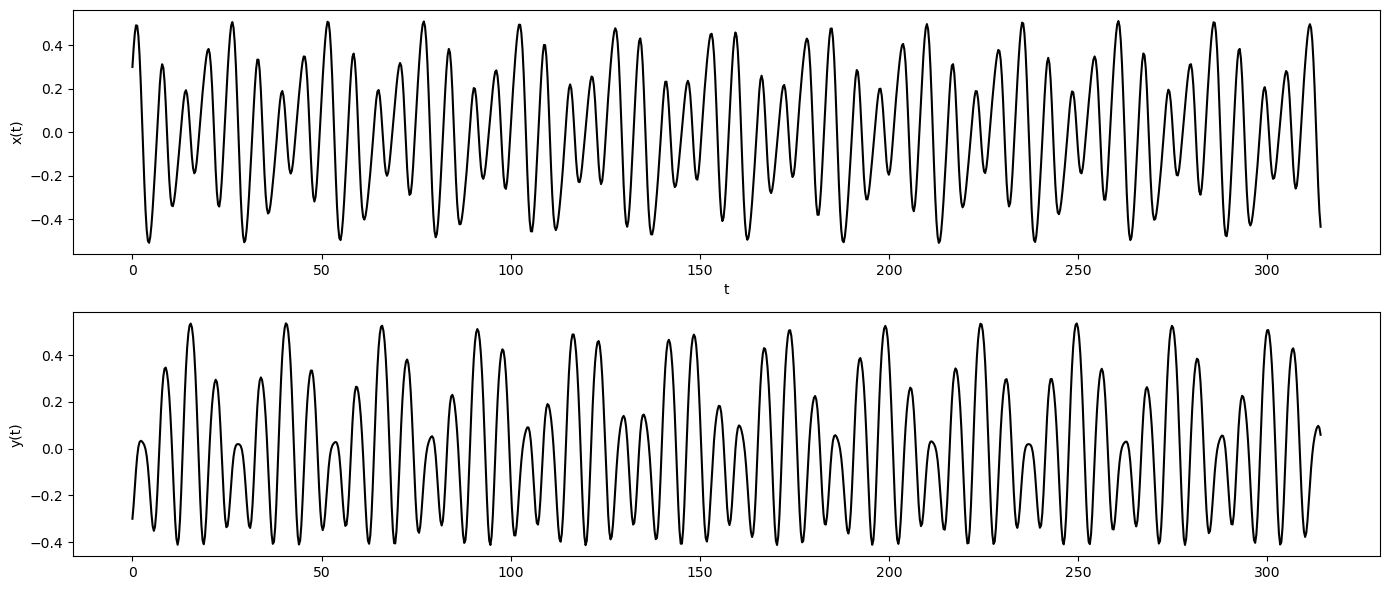

In [9]:
# lines = loadtxt("filename.dat", comments="#", delimiter=",", unpack=False)
tdata = loadtxt("data/HenonHeiles/t.dat")
xdata = loadtxt("data/HenonHeiles/x.dat")
ydata = loadtxt("data/HenonHeiles/y.dat")

N = len(tdata)
print("The time series consist of ", N, " points.")

plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(tdata,xdata,'k')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
plt.plot(tdata,ydata,'k')
plt.ylabel('y(t)')
plt.tight_layout()



#### Short range forecast

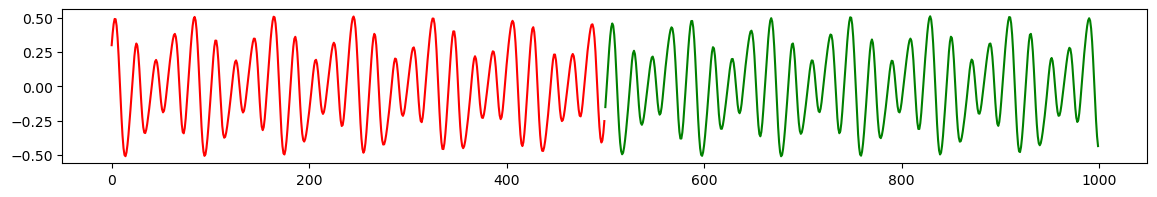

In [10]:
trainlen = int(0.8*N)
testlen  = int(0.2*N)
trainlen = int(0.5*N)
testlen  = int(0.5*N)


# Input  data
ttrain = np.ones(trainlen)
ttest=np.ones(testlen)

# ttrain = tdata[:trainlen]
# ttest  = tdata[trainlen:trainlen+testlen]

ytrain = ydata[:trainlen]
ytest  = ydata[trainlen:trainlen+testlen]

# Output data
xtrain = xdata[:trainlen]
xtest = xdata[trainlen:trainlen+testlen]

plt.figure(figsize=(14,2))

plt.plot(range(0,trainlen), xtrain,'r')
plt.plot(range(trainlen,trainlen+testlen), xtest,'-g')
# plt.plot(ttrain, xtrain,'b')
# plt.plot(ttest, xtest,'-r')

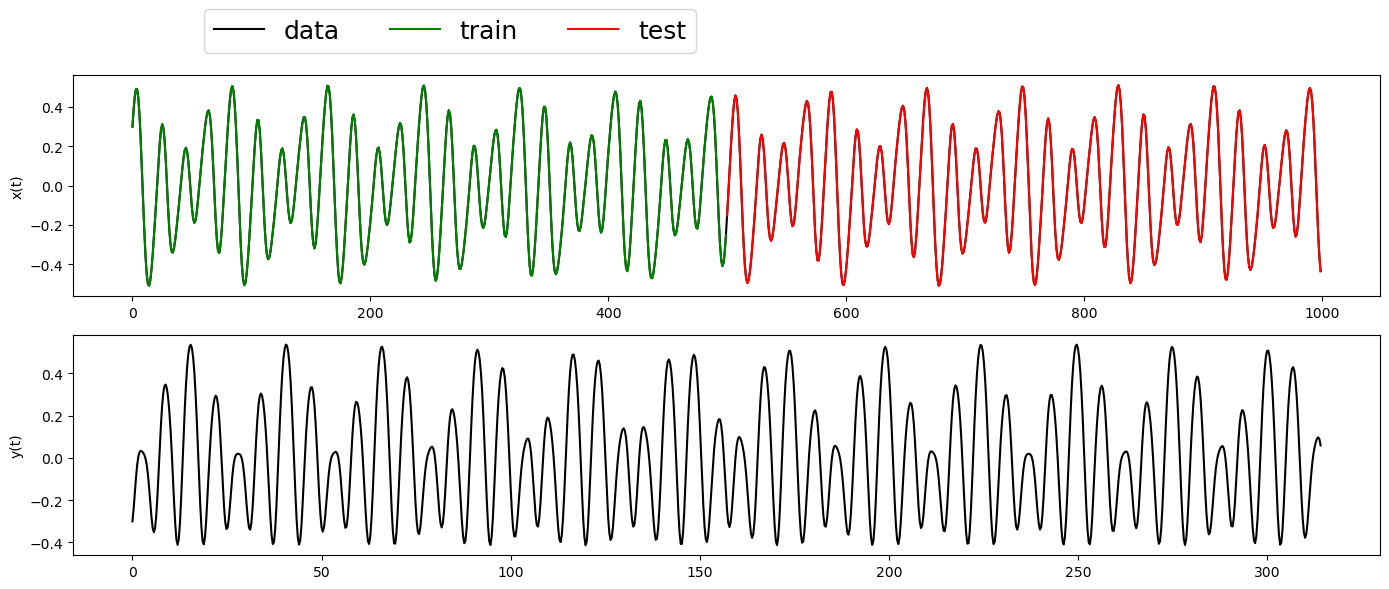

In [11]:
plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(range(0,trainlen+testlen),xdata,'k',label='data')
plt.plot(range(0,trainlen), xtrain,'g',label='train')
plt.plot(range(trainlen,trainlen+testlen), xtest,'-r',label='test')
plt.ylabel('x(t)')
plt.legend(loc=(0.1,1.1),fontsize=18,ncol=3)
plt.subplot(2,1,2)
plt.plot(tdata,ydata,'k')
plt.ylabel('y(t)')
plt.tight_layout()


plt.tight_layout()

In [12]:
inputTrain = ttrain
inputTest = ttest
# inputTrain = np.stack((ttrain), axis=1)
# inputTest = np.stack((ttest), axis=1)
# n_inp = len(inputTrain)
n_inp = 1 
print(n_inp)

esn = ESN(n_inputs = n_inp,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 1.5,
          sparsity=.2,
#           noise = 0.002,
          noise = 0.0001,
          random_state=42,
          silent = False
         )


# Train and predict 
xfit = esn.fit(inputTrain, xtrain)
xhat = prediction = esn.predict(inputTest)

1
harvesting states...
fitting...
training error:
2.92117293980709e-14


Training mean square error:  2.92117293980709e-14
Testing  mean square error:  0.1940786552819527


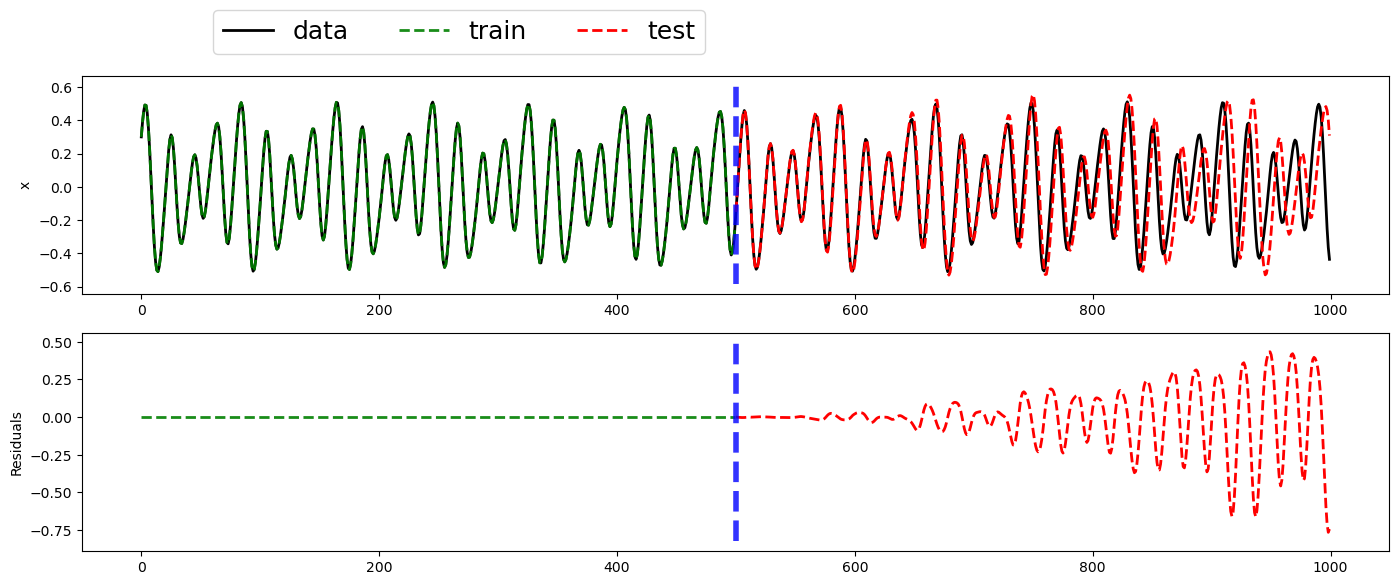

In [13]:
# MSE in the training and testing
scoreTrain = myMSE(xfit,xtrain)
scoreTest = myMSE(xhat,xtest)
print("Training mean square error: ",scoreTrain)
print("Testing  mean square error: ",scoreTest)
# Residuals 
resTrain = residuals(xfit,xtrain);
resTest = residuals(xhat,xtest);

# Plot:
plotResults(trainlen, testlen, xdata, xfit, xhat, resTrain, resTest)

# plt.savefig('xHH.png', dpi = 300)

#### Long range forecast (inference)

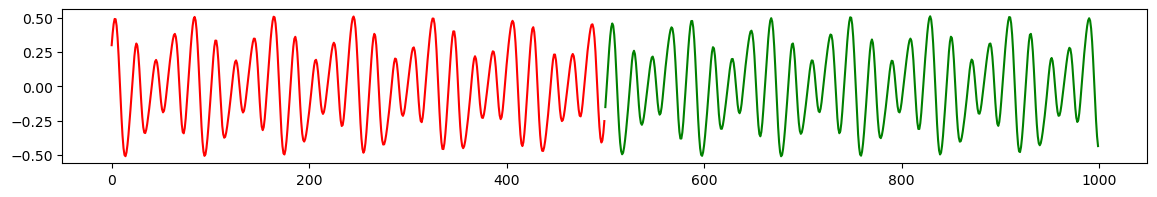

In [14]:
trainlen = int(0.5*N)
testlen  = int(0.5*N)

# Input  data
ttrain = np.ones(trainlen)
ttest=np.ones(testlen)

ytrain = ydata[:trainlen]
ytest  = ydata[trainlen:trainlen+testlen]

# Output data
xtrain = xdata[:trainlen]
xtest = xdata[trainlen:trainlen+testlen]


plt.figure(figsize=(14,2))
plt.plot(range(0,trainlen), xtrain,'r')
plt.plot(range(trainlen,trainlen+testlen), xtest,'-g')
# plt.plot(ttrain, xtrain,'b')
# plt.plot(ttest, xtest,'-r')

In [15]:
inputTrain = np.stack((ttrain,ytrain), axis=1)
inputTest = np.stack((ttest,ytest), axis=1)

esn = ESN(n_inputs = 2,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 1.5,
          sparsity=.2,
          noise =0.0001,
          random_state=42
         )

# Train and predict 
xfit = esn.fit(inputTrain, xtrain)
xhat = prediction = esn.predict(inputTest)

Training mean square error:  3.113875458101361e-14
Testing  mean square error:  0.0007741552715293226


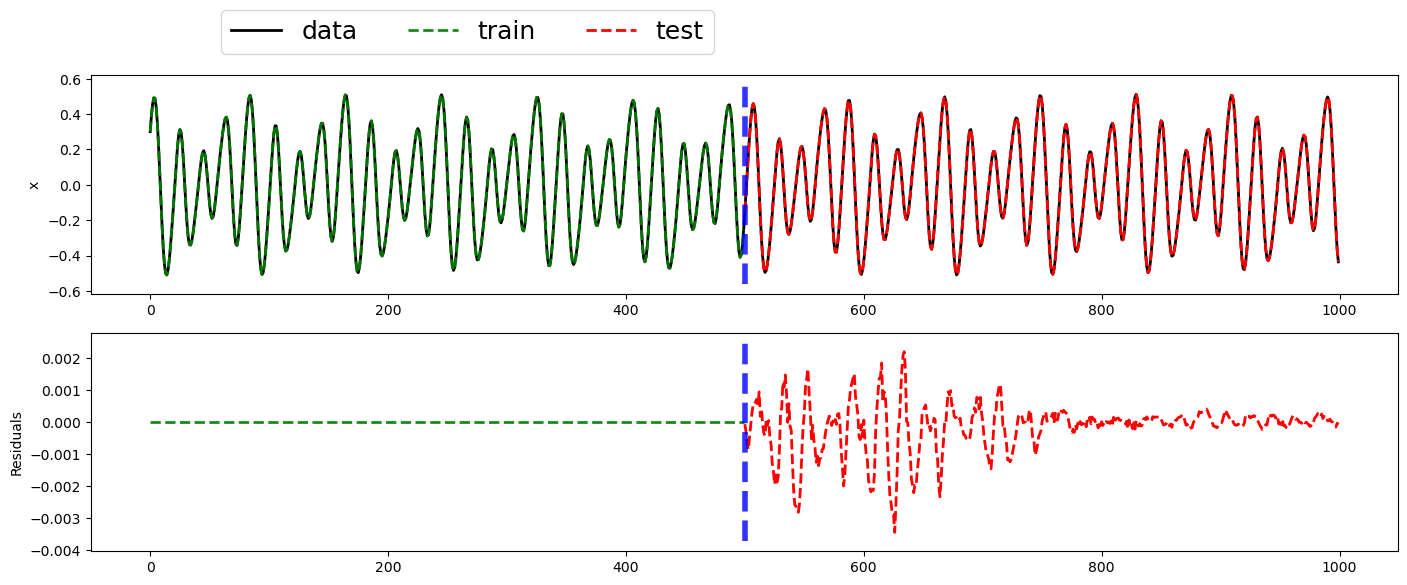

In [16]:
# MSE in the training and testing
scoreTrain = myMSE(xfit,xtrain)
scoreTest = myMSE(xhat,xtest)
print("Training mean square error: ",scoreTrain)
print("Testing  mean square error: ",scoreTest)
# Residuals 
resTrain = residuals(xfit,xtrain);
resTest = residuals(xhat,xtest);

# Plot:
plotResults(trainlen, testlen, xdata, xfit, xhat, resTrain, resTest)

# plt.savefig('xHH.png', dpi = 300)

The time series consist of  1000  points.


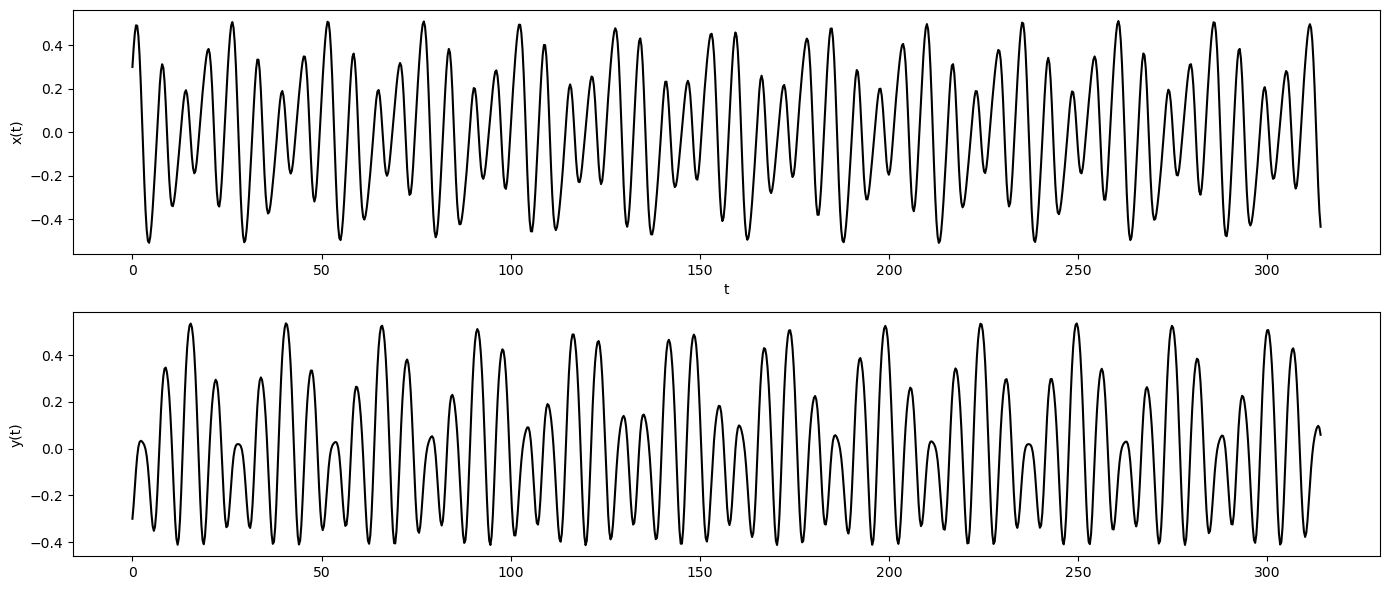

In [17]:
# lines = loadtxt("filename.dat", comments="#", delimiter=",", unpack=False)
tdata = loadtxt("data/HenonHeiles/t.dat")
xdata = loadtxt("data/HenonHeiles/x.dat")
ydata = loadtxt("data/HenonHeiles/y.dat")

N = len(tdata)
print("The time series consist of ", N, " points.")

plt.figure(figsize=(14,6))
plt.subplot(2,1,1)
plt.plot(tdata,xdata,'k')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.subplot(2,1,2)
plt.plot(tdata,ydata,'k')
plt.ylabel('y(t)')
plt.tight_layout()